Tutorial from Clairvoyant using Convolutional Neural Networks. 

(https://blog.clairvoyantsoft.com/music-genre-classification-using-cnn-ef9461553726)

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

## 2. Read the CSV file

In [2]:
# All data downloaded from kaggle (2021-12-29)
# https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
df = pd.read_csv('data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## 3. About the Dataset

In [3]:
df.shape

(9990, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
# dropping the first column 'filename' as it is unnecessary
df = df.drop(labels='filename', axis=1)

In [6]:
df.dtypes

length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean          

## 4. Understanding the Audio Files

In [7]:
audio_recordings= 'data/genres_original/country/country.00050.wav'
data, sr = librosa.load(audio_recordings)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [8]:
data, sr = librosa.load(audio_recordings) 

In [9]:
librosa.load(audio_recordings, sr=45600)

(array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
        -0.11823352, -0.05911855], dtype=float32),
 45600)

In [12]:
import IPython
IPython.display.Audio(data, rate=sr)

# Visualizing Audio Files

## 1. Plot Raw Wave Files

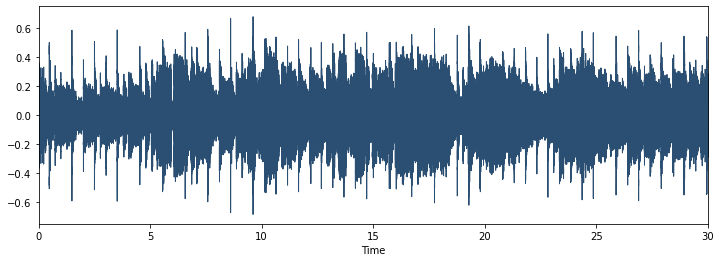

In [13]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, color="#2B4F72")
plt.show()

## 2. Spectograms

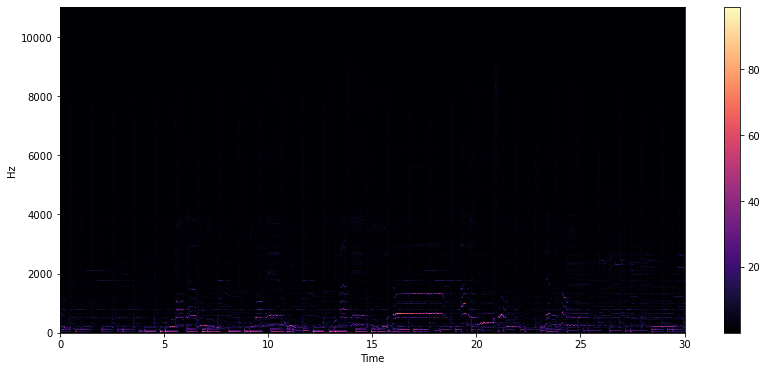

In [15]:
# Plotting a 2-dimensional array
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

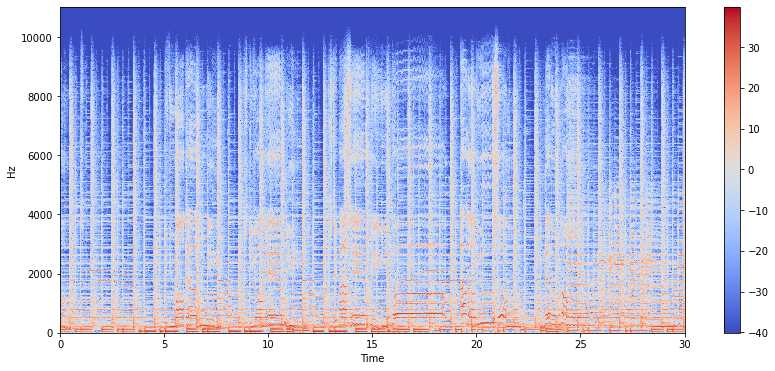

In [16]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

## 3. Spectral Rolloff

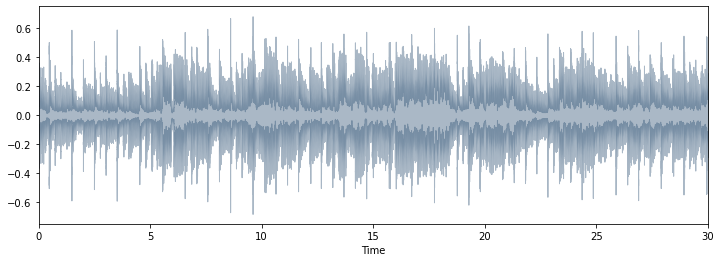

In [18]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sr, alpha=0.4, color='#2B4F72')

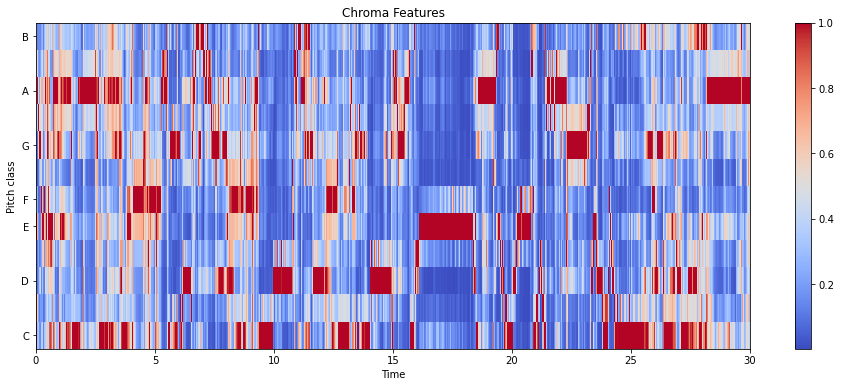

In [19]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16, 6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

## 5. Zero Crossing

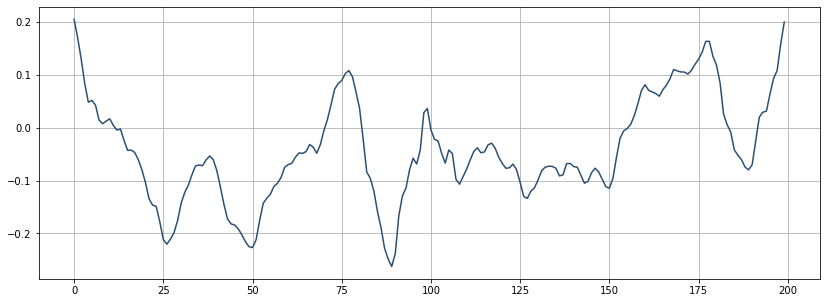

In [20]:
start = 1000
end = 1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color='#2B4F72')
plt.grid()

In [21]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print('The number of zero-crossing is :', sum(zero_cross_rate))

The number of zero-crossing is : 8
